# Обучение без учителя

## Задание 1

Импортируйте библиотеки **pandas**, **numpy** и **matplotlib**. <br>
Загрузите **"Boston House Prices dataset"** из встроенных наборов данных библиотеки **sklearn**.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.datasets import load_boston

Создайте датафреймы **X** и **y** из этих данных.

In [2]:
boston = load_boston()

X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
y = pd.DataFrame(boston['target'], columns=['price'])

Разбейте эти датафреймы на тренировочные **(X_train, y_train)** и тестовые **(X_test, y_test)** с помощью функции **train_test_split** так, чтобы размер тестовой выборки составлял _20%_ от всех данных, при этом аргумент random_state должен быть равен _42_.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=42)

Масштабируйте данные с помощью **StandardScaler**.

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=boston['feature_names'])
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=boston['feature_names'])

Постройте модель **TSNE** на тренировочный данных с параметрами: **n_components=2, learning_rate=250, random_state=42**.

In [5]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print(f'До:\t{X_train_scaled.shape}')
print(f'После:\t{X_train_tsne.shape}')

До:	(404, 13)
После:	(404, 2)


Постройте диаграмму рассеяния на этих данных.

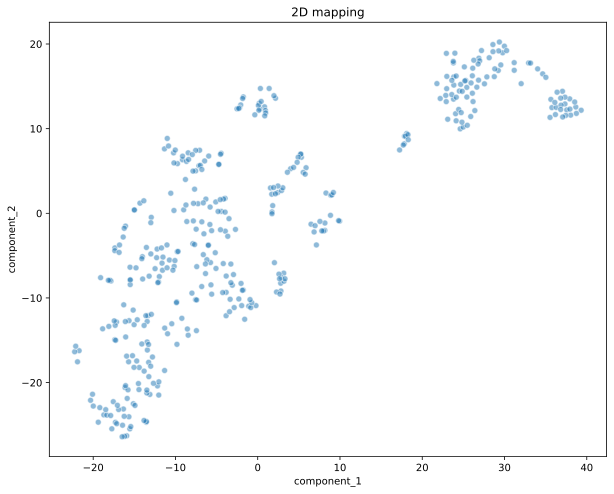

In [6]:
plt.figure(figsize = (10, 8))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], alpha=0.5, ec='white')
plt.xlabel('component_1')
plt.ylabel('component_2')
plt.title('2D mapping')
plt.show()

## Задание 2

С помощью **KMeans** разбейте данные из тренировочного набора на _3_ кластера, используйте все признаки из датафрейма **X_train**. <br>
Параметр **max_iter** должен быть равен _100_, **random_state** сделайте равным _42_.

In [7]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, max_iter=100, random_state=42)
train_labels = pd.DataFrame(model.fit_predict(X_train_scaled), columns=['clusters'])
train_labels.head()

,clusters
0,1
1,0
2,2
3,1
4,0


Постройте еще раз диаграмму рассеяния на данных, полученных с помощью **TSNE**, и раскрасьте точки из разных кластеров разными цветами.

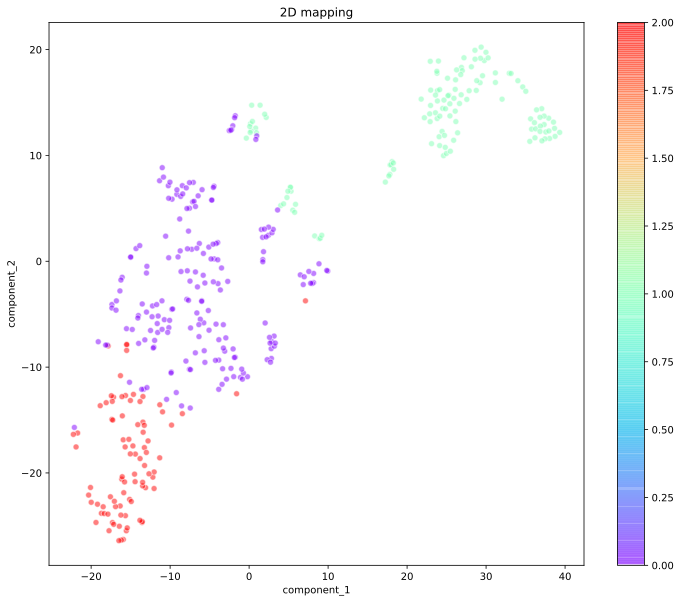

In [8]:
plt.figure(figsize = (12, 10))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels['clusters'], 
            cmap='rainbow', alpha=0.5, ec='white')
plt.xlabel('component_1')
plt.ylabel('component_2')
plt.title('2D mapping')
plt.colorbar()
plt.show()

Вычислите средние значения **price** и **CRIM** в разных кластерах.

In [9]:
df_crim = pd.concat([pd.DataFrame(X_train['CRIM'].values, columns=['CRIM']), train_labels], axis=1)
df_crim.groupby(['clusters']).mean()

,CRIM
clusters,
0,0.421660
1,10.797028
2,0.073566


In [10]:
df_price = pd.concat([pd.DataFrame(y_train.values, columns=['price']), train_labels], axis=1)
df_price.groupby(['clusters']).mean()

,price
clusters,
0,24.958115
1,16.165354
2,27.788372


## *Задание 3

Примените модель **KMeans**, построенную в предыдущем задании, к данным из тестового набора.

In [11]:
test_labels = pd.DataFrame(model.predict(X_test_scaled), columns=['clusters'])
test_labels.head()

,clusters
0,0
1,2
2,1
3,0
4,1


Вычислите средние значения **price** и **CRIM** в разных кластерах на тестовых данных.

In [12]:
df_crim_test = pd.concat([pd.DataFrame(X_test['CRIM'].values, columns=['CRIM']), test_labels], axis=1)
df_crim_test.groupby(['clusters']).mean()

,CRIM
clusters,
0,0.266079
1,10.165531
2,0.062060


In [13]:
df_price_test = pd.concat([pd.DataFrame(y_test.values, columns=['price']), test_labels], axis=1)
df_price_test.groupby(['clusters']).mean()

,price
clusters,
0,21.860784
1,16.437143
2,31.350000


## *Задание 4

Обучите любую модель регрессии на этом же датасете.

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

In [15]:
from sklearn.metrics import r2_score, mean_squared_error
print(f'R2: {r2_score(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')

R2: 0.6687594935356321
MSE: 24.29111947497351


Добавьте новый признак - метка кластера, которую вы уже получили применив модель кластеризации к этим данным. Сравнить качество без метки кластера и с ней по отложенной выборке.

In [16]:
X_train_clusters = pd.concat([X_train_scaled, train_labels], axis=1)
X_test_clusters = pd.concat([X_test_scaled, test_labels], axis=1)
lr.fit(X_train_clusters, y_train)
y_pred = lr.predict(X_test_clusters)

In [17]:
from sklearn.metrics import r2_score, mean_squared_error
print(f'R2: {r2_score(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')

R2: 0.6688794358164194
MSE: 24.282323653762504


Видим, что метрики немного улучшились, то есть можно утверждать о положительном эффекте от добавления данного признака.

## *Задание 5

Загрузите `"wine dataset"` из встроенных наборов данных библиотеки **sklearn**.
Создайте датафреймы **X** и **y** из этих данных.

In [18]:
from sklearn.datasets import load_wine
data = load_wine()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [19]:
y = pd.DataFrame(data['target'], columns=['class'])
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


Разбейте эти датафреймы на тренировочные и тестовые.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

Масштабируйте данные.

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=data['feature_names'])
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=data['feature_names'])

Постройте модель понижения размерности на тренировочных данных, визуализируйте с помощью диаграммы рассеяния, подберите оптимальные гиперпараметры, чтобы сегментов на графике было столько, сколько классов в данных.

In [22]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=200, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print(f'До:\t{X_train_scaled.shape}')
print(f'После:\t{X_train_tsne.shape}')

До:	(119, 13)
После:	(119, 2)


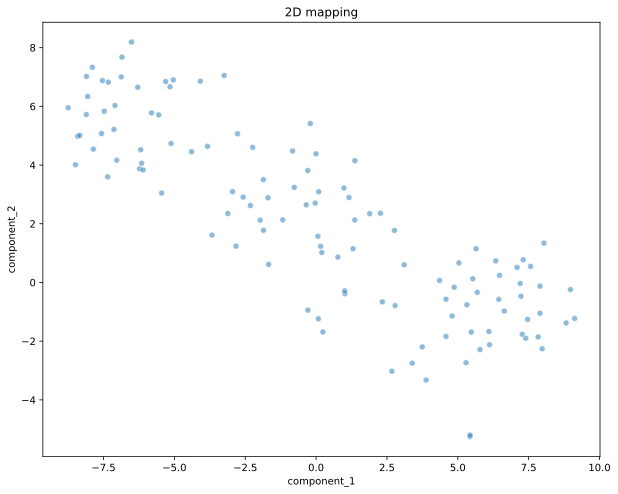

In [23]:
plt.figure(figsize = (10, 8))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], alpha=0.5, ec='white')
plt.xlabel('component_1')
plt.ylabel('component_2')
plt.title('2D mapping')
plt.show()

На данном графике можно выделить три сегмента.

_С помощью модели кластеризации (поэкспериментируйте и с другими моделями, не только с **KMeans**) разбейте данные из тренировочного набора на необходимое количество кластеров. <br>
Постройте диаграмму рассеяния на данных, полученных с помощью понижения размерности и раскрасьте точки из разных кластеров разными цветами._

##### KMeans

In [24]:
model_km = KMeans(n_clusters=3, max_iter=100, random_state=42)
train_labels_km = pd.DataFrame(model_km.fit_predict(X_train_scaled), columns=['clusters'])
train_labels_km.head()

,clusters
0,2
1,1
2,0
3,0
4,1


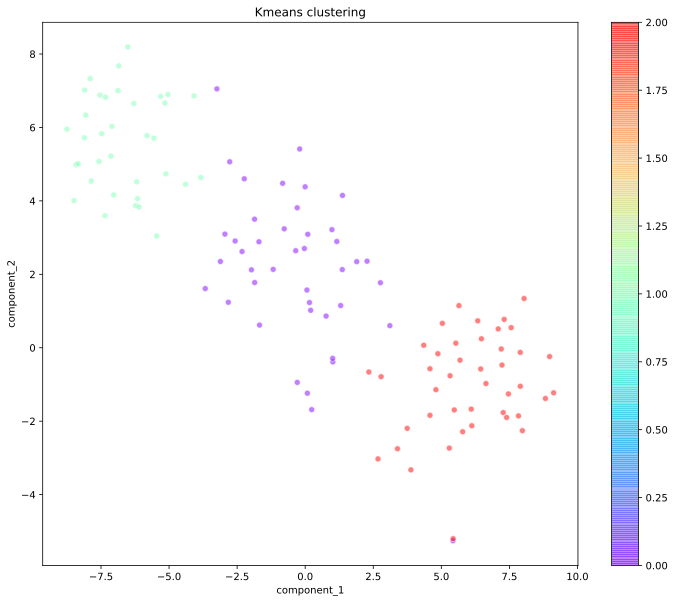

In [25]:
plt.figure(figsize = (12, 10))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels_km['clusters'], 
            cmap='rainbow', alpha=0.5, ec='white')
plt.xlabel('component_1')
plt.ylabel('component_2')
plt.title('Kmeans clustering')
plt.colorbar()
plt.show()

##### Агломеративная кластеризация

In [26]:
from sklearn.cluster import AgglomerativeClustering

model_ac = AgglomerativeClustering(n_clusters=3)

train_labels_ac = pd.DataFrame(model_ac.fit_predict(X_train_scaled), columns=['clusters'])
train_labels_ac.head()

,clusters
0,0
1,1
2,2
3,0
4,1


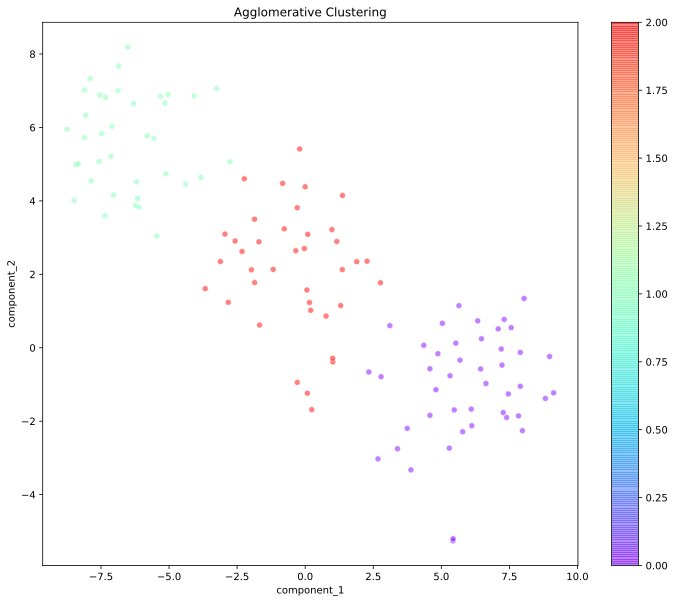

In [27]:
plt.figure(figsize = (12, 10))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels_ac['clusters'], 
            cmap='rainbow', alpha=0.5, ec='white')
plt.xlabel('component_1')
plt.ylabel('component_2')
plt.title('Agglomerative Clustering')
plt.colorbar()
plt.show()

##### Спектральная кластеризация

In [28]:
from sklearn.cluster import SpectralClustering

model_sc = SpectralClustering(n_clusters=3, eigen_solver='arpack', affinity="nearest_neighbors")

train_labels_sc = pd.DataFrame(model_sc.fit_predict(X_train_scaled), columns=['clusters'])
train_labels_sc.head()

,clusters
0,2
1,1
2,0
3,2
4,1


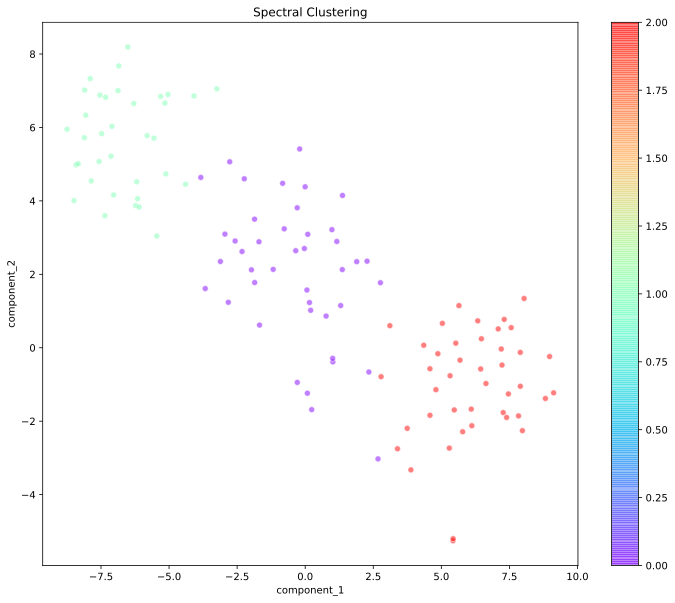

In [29]:
plt.figure(figsize = (12, 10))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels_sc['clusters'], 
            cmap='rainbow', alpha=0.5, ec='white')
plt.xlabel('component_1')
plt.ylabel('component_2')
plt.title('Spectral Clustering')
plt.colorbar()
plt.show()

_Убедитесь с помощью визуализации, что разбиение данных из тестового набора получилось успешным._

Построим графики **SwarmPlot** для каждого алгоритма. Это обеспечит лучшую наглядность и позволит сделать выводы относительно успешности разбиения тестовых данных на кластеры.

##### KMeans

In [30]:
test_labels_km = model_km.predict(X_test_scaled)
test_labels_km

array([2, 2, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1, 2, 1, 2, 0, 0, 0, 2, 0, 2, 0,
       0, 1, 1, 1, 0, 0, 0, 2, 2, 0, 1, 2, 2, 2, 1, 1, 0, 1, 2, 0, 0, 0,
       1, 2, 0, 0, 1, 2, 0, 2, 2, 1, 1, 0, 0, 2, 0], dtype=int32)

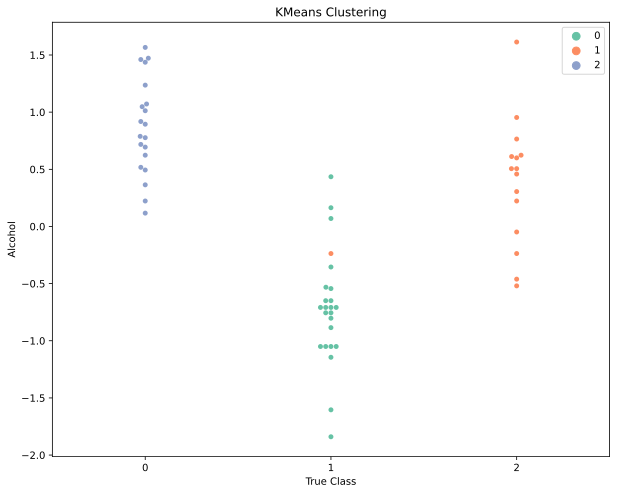

In [31]:
import seaborn as sns
plt.figure(figsize = (10, 8))
sns.swarmplot(x=y_test.reset_index()['class'], y=X_test_scaled['alcohol'], 
              hue=test_labels_km, palette='Set2')
plt.xlabel('True Class')
plt.ylabel('Alcohol')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

##### Агломеративная кластеризация

У данной модели нет метода `.predict`. Поэтому чтобы предсказать разбиение на кластеры для тестовых данных, воспользуемся алгоритмом KNN.

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn_ac = KNeighborsClassifier(n_neighbors=5)
knn_ac.fit(X_train_scaled, train_labels_ac['clusters'])

test_labels_ac = knn_ac.predict(X_test_scaled)

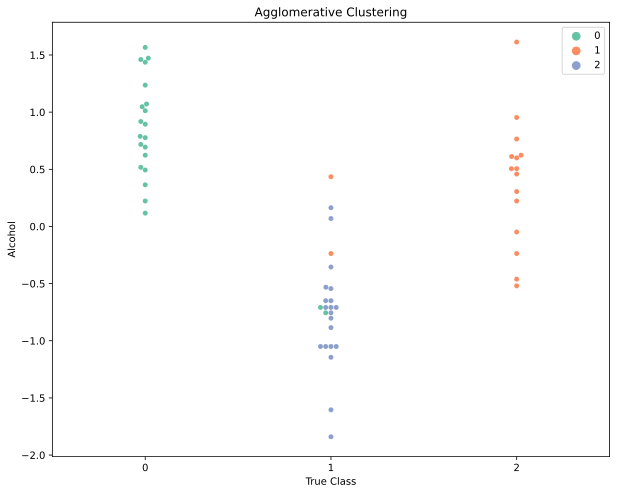

In [33]:
plt.figure(figsize = (10, 8))
sns.swarmplot(x=y_test.reset_index()['class'], y=X_test_scaled['alcohol'], 
              hue=test_labels_ac, palette='Set2')
plt.xlabel('True Class')
plt.ylabel('Alcohol')
plt.title('Agglomerative Clustering')
plt.legend()
plt.show()

##### Спектральная кластеризация

Аналогично воспользуемся алгоритмом KNN для разбиения на кластеры для тестовых данных.

In [34]:
knn_sc = KNeighborsClassifier(n_neighbors=5)
knn_sc.fit(X_train_scaled, train_labels_sc['clusters'])

test_labels_sc = knn_sc.predict(X_test_scaled)

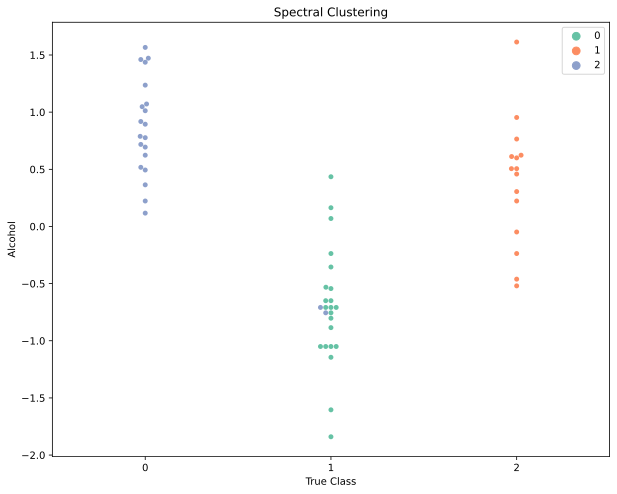

In [35]:
plt.figure(figsize = (10, 8))
sns.swarmplot(x=y_test.reset_index()['class'], y=X_test_scaled['alcohol'], 
              hue=test_labels_sc, palette='Set2')
plt.xlabel('True Class')
plt.ylabel('Alcohol')
plt.title('Spectral Clustering')
plt.legend()
plt.show()

_Сделайте вывод, какие модели лучше себя показывают на этой задаче._

Видим, что все алгоритмы справились довольно успешно с кластеризацией тестовых данных. Самым точным оказался **KMeans**, который допустил только одну ошибку. Алгоритм спектральной кластеризации допустил две ошибки на тестовых данных. Хуже всех показала себя агломеративная кластеризация.

## *Задание 6

Используйте `"Olivetti faces data-set from AT&T"` из встроенных наборов данных библиотеки **sklearn**.

In [36]:
from sklearn.datasets import fetch_olivetti_faces
data = fetch_olivetti_faces(shuffle=True, random_state=42)

In [37]:
X = pd.DataFrame(data['data'])
y = data['target']
X.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.198347,0.235537,0.351240,0.409091,0.421488,0.429752,0.500000,0.528926,0.524793,0.553719,...,0.528926,0.508264,0.524793,0.504132,0.483471,0.471074,0.285124,0.061983,0.128099,0.090909
1,0.185950,0.128099,0.115702,0.132231,0.185950,0.268595,0.433884,0.541322,0.570248,0.586777,...,0.400826,0.396694,0.409091,0.301653,0.421488,0.462810,0.247934,0.190083,0.210744,0.210744
2,0.508264,0.603306,0.619835,0.628099,0.657025,0.665289,0.690083,0.727273,0.743802,0.768595,...,0.438017,0.301653,0.305785,0.314050,0.326446,0.338843,0.330579,0.334711,0.342975,0.342975
3,0.136364,0.140496,0.185950,0.280992,0.318182,0.363636,0.409091,0.417355,0.438017,0.454545,...,0.198347,0.169421,0.206612,0.276859,0.355372,0.685950,0.661157,0.280992,0.371901,0.276859
4,0.652893,0.644628,0.652893,0.706612,0.714876,0.719008,0.743802,0.747934,0.747934,0.756198,...,0.061983,0.074380,0.074380,0.082645,0.082645,0.111570,0.070248,0.086777,0.185950,0.231405


Данные уже масштабированы, разобьем их на тренировочный и тестовый датасеты.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)
X_train.shape

(280, 4096)

Обучить любую модель классификации на этом датасете до применения **PCA** (количество компонент подберите самостоятельно) и после него. Сравнить качество классификации по отложенной выборке.

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

rc = RandomForestClassifier(n_estimators=200, random_state=42)
rc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [40]:
y_pred_test = rc.predict(X_test)
y_pred_train = rc.predict(X_train)
print(f'Train dataset accuracy score: {accuracy_score(y_train, y_pred_train)}')
print(f'Test dataset accuracy score: {accuracy_score(y_test, y_pred_test):.3f}')

Train dataset accuracy score: 1.0
Test dataset accuracy score: 0.917


Выделим главные компоненты и посмотрим, какое влияние это окажет на результаты нашей модели.

In [41]:
pca = PCA(n_components=20, random_state=42)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [42]:
rc.fit(X_train_pca, y_train)
y_pred_test_pca = rc.predict(X_test_pca)
y_pred_train_pca = rc.predict(X_train_pca)
print(f'Train PCA-dataset accuracy score: {accuracy_score(y_train, y_pred_train_pca)}')
print(f'Test PCA-dataset accuracy score: {accuracy_score(y_test, y_pred_test_pca):.3f}')

Train PCA-dataset accuracy score: 1.0
Test PCA-dataset accuracy score: 0.933


Как видим выделение главных компонент позволило улучшить показатель **accuracy** классификационной модели на тестовом датасете.